# 1. Import dependencies and data

In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [126]:
y = train['Survived']

In [127]:
X = train.drop('Survived', axis=1)

# 2. Quick check of the data

In [128]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [131]:
X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3. Data processing

## 3.1 Sex encoding

In [133]:
print(X['Sex'].head())
X['Sex'] = X['Sex'].replace({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].replace({'male': 0, 'female': 1})

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object


/tmp/ipykernel_34/1658049296.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Sex'] = X['Sex'].replace({'male': 0, 'female': 1})
/tmp/ipykernel_34/1658049296.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace({'male': 0, 'female': 1})


In [134]:
X['Sex'].unique()

array([0, 1])

## 3.2 Title encoding

In [135]:
X['Title'] = X['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [136]:
X['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [137]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [138]:
title_category = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Dr", "Rev": "Rev",
                "Col": "Military", "Mlle": "Miss", "Major": "Military", "Ms": "Miss", "Mme": "Mrs", "Sir": "Nobility",
                "Capt": "Military", "Lady": "Nobility", "the Countess": "Nobility", "Jonkheer": "Nobility",
                "Don": "Nobility", "Dona": "Nobility"}

In [139]:
X['Title_categorical'] = X['Title'].map(title_category)
test['Title_categorical'] = test['Title'].map(title_category)

In [140]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

title_categorical_le = LabelEncoder()
X['Title_categorical_encoded'] = title_categorical_le.fit_transform(X['Title_categorical'])
test['Title_categorical_encoded'] = title_categorical_le.transform(test['Title_categorical'])

## 3.3 Family size

In [141]:
X['Family_size'] = X['SibSp'] + X['Parch'] + 1
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [142]:
X['Is_alone'] = (X['Family_size'] == 1).astype(int)
test['Is_alone'] = (test['Family_size'] == 1).astype(int)

## 3.4 Fare per person

In [143]:
X['Fare_per_person'] = X['Fare'] / X['Family_size']
test['Fare_per_person'] = test['Fare'] / test['Family_size']

In [144]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

imputer = KNNImputer(n_neighbors=2, missing_values=np.nan)
X[['Fare_per_person', 'SibSp', 'Parch', 'Pclass']] = imputer.fit_transform(X[['Fare_per_person', 'SibSp', 'Parch', 'Pclass']])
test[['Fare_per_person', 'SibSp', 'Parch', 'Pclass']] = imputer.transform(test[['Fare_per_person', 'SibSp', 'Parch', 'Pclass']])

In [145]:
X['Fare'] = X['Fare'].fillna(X['Fare_per_person'] * X['Family_size'])
test['Fare'] = test['Fare'].fillna(test['Fare_per_person'] * test['Family_size'])

### 3.4.1 Scale the fare

In [146]:
scaller = RobustScaler()
X['Fare_per_person_scaled'] = scaller.fit_transform(X[['Fare_per_person']])
test['Fare_per_person_scaled'] = scaller.transform(test[['Fare_per_person']])

In [147]:
bins = [-1, -0.25, -0.05, 0.1, 1.5, 4, np.inf]

labels = np.linspace(0, 1, len(bins)-1)

X['Fare_per_person_binned'] = pd.cut(X['Fare_per_person_scaled'], bins=bins, labels=labels).astype(float)
test['Fare_per_person_binned'] = pd.cut(test['Fare_per_person_scaled'], bins=bins, labels=labels).astype(float)

<Axes: ylabel='Frequency'>

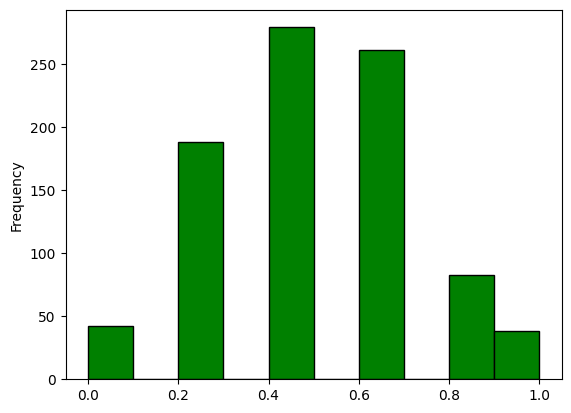

In [148]:
X['Fare_per_person_binned'].plot.hist(bins=10, color='green', edgecolor='black')

## 3.5 Deck of cabin

In [149]:
X['Deck'] = X['Cabin'].str[0]
test['Deck'] = test['Cabin'].str[0]

In [150]:
print(X['Deck'].value_counts())
print(test['Deck'].value_counts())

Deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64
Deck
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: count, dtype: int64


In [151]:
X['Deck'] = X['Deck'].replace('T', 'A')

In [152]:
deck_le = LabelEncoder()
X['Deck_encoded'] = deck_le.fit_transform(X['Deck'])
test['Deck_encoded'] = deck_le.transform(test['Deck'])

## 3.6 Filling missing values in column Embarked and encoding it

In [153]:
embarked_le = LabelEncoder()
X['Embarked_encoded'] = embarked_le.fit_transform(X['Embarked'])
test['Embarked_encoded'] = embarked_le.transform(test['Embarked'])

In [154]:
embarked_imputer = IterativeImputer(max_iter=10, random_state=42, missing_values=-1)
X[['Embarked_encoded', 'Fare_per_person', 'Deck_encoded', 'Pclass']] = (
        embarked_imputer.fit_transform(X[['Embarked_encoded', 'Fare_per_person', 'Deck_encoded', 'Pclass']]))
test[['Embarked_encoded', 'Fare_per_person', 'Deck_encoded', 'Pclass']] = (
        embarked_imputer.transform(test[['Embarked_encoded', 'Fare_per_person', 'Deck_encoded', 'Pclass']]))

## 3.7 Impute missing values for Deck encoded column

In [155]:
X['Deck_encoded_no_missing'] = X['Deck_encoded'].replace(7, -1)
test['Deck_encoded_no_missing'] = test['Deck_encoded'].replace(7, -1)

In [156]:
deck_imputer = KNNImputer(n_neighbors=2, missing_values=-1)
X[['Deck_encoded_no_missing', 'Pclass', 'Fare_per_person', 'Embarked_encoded', 'Is_alone']] = deck_imputer.fit_transform(X[['Deck_encoded_no_missing', 'Pclass', 'Fare_per_person', 'Embarked_encoded', 'Is_alone']])
test[['Deck_encoded_no_missing', 'Pclass', 'Fare_per_person', 'Embarked_encoded', 'Is_alone']] = deck_imputer.transform(test[['Deck_encoded_no_missing', 'Pclass', 'Fare_per_person', 'Embarked_encoded', 'Is_alone']])

## 3.8 Group Age into bins

In [157]:
bins = list(np.arange(0, 90, 10))
X['Age_group'] = pd.cut(X['Age'], bins=bins, labels=bins[:-1]).astype(float)
test['Age_group'] = pd.cut(test['Age'], bins=bins, labels=bins[:-1]).astype(float)

<Axes: ylabel='Frequency'>

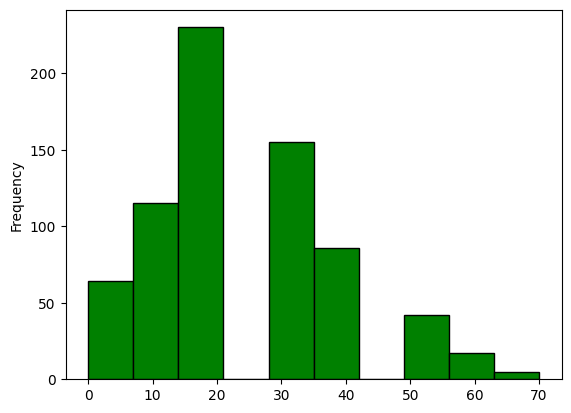

In [158]:
X['Age_group'].plot.hist(bins=10, color='green', edgecolor='black')

In [159]:
age_group_le = LabelEncoder()
X['Age_group_encoded'] = age_group_le.fit_transform(X['Age_group'])
test['Age_group_encoded'] = age_group_le.transform(test['Age_group'])

In [160]:
X['Age_group_encoded'] = X['Age_group_encoded'].replace(8, -1)
test['Age_group_encoded'] = test['Age_group_encoded'].replace(8, -1)

age_group_imputer = IterativeImputer(max_iter=10, random_state=42, missing_values=-1)

X[['Age_group_encoded', 'SibSp', 'Title_categorical_encoded', 'Is_alone', 'Parch']] = age_group_imputer.fit_transform(X[['Age_group_encoded', 'SibSp', 
                                                                                                                         'Title_categorical_encoded', 'Is_alone', 'Parch']])
test[['Age_group_encoded', 'SibSp', 'Title_categorical_encoded', 'Is_alone', 'Parch']] = age_group_imputer.transform(test[['Age_group_encoded', 'SibSp', 
                                                                                                                           'Title_categorical_encoded', 'Is_alone', 'Parch']])

## 3.9 Check if someone had multiple cabins

In [161]:
X['Multiple_cabins'] = X['Cabin'].apply(lambda x: -1 if pd.isna(x) else (1 if len(x.split()) > 1 else 0))
test['Multiple_cabins'] = test['Cabin'].apply(lambda x: -1 if pd.isna(x) else (1 if len(x.split()) > 1 else 0))

# 4. Plot correlation matrix

In [162]:
X.isnull().sum()

PassengerId                    0
Pclass                         0
Name                           0
Sex                            0
Age                          177
SibSp                          0
Parch                          0
Ticket                         0
Fare                           0
Cabin                        687
Embarked                       2
Title                          0
Title_categorical              0
Title_categorical_encoded      0
Family_size                    0
Is_alone                       0
Fare_per_person                0
Fare_per_person_scaled         0
Fare_per_person_binned         0
Deck                         687
Deck_encoded                   0
Embarked_encoded               0
Deck_encoded_no_missing        0
Age_group                    177
Age_group_encoded              0
Multiple_cabins                0
dtype: int64

In [163]:
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_categorical',
       'Title_categorical_encoded', 'Family_size', 'Is_alone',
       'Fare_per_person', 'Fare_per_person_scaled', 'Fare_per_person_binned',
       'Deck', 'Deck_encoded', 'Embarked_encoded', 'Deck_encoded_no_missing',
       'Age_group', 'Age_group_encoded', 'Multiple_cabins'],
      dtype='object')

In [167]:
data_for_correlation = pd.concat([X[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Title_categorical_encoded', 'Family_size', 'Is_alone', 'Fare_per_person', 'Fare_per_person_scaled', 
                                     'Fare_per_person_binned', 'Deck_encoded', 'Embarked_encoded', 'Deck_encoded_no_missing','Age_group_encoded', 'Multiple_cabins']], y], axis=1)

corr = data_for_correlation.corr()

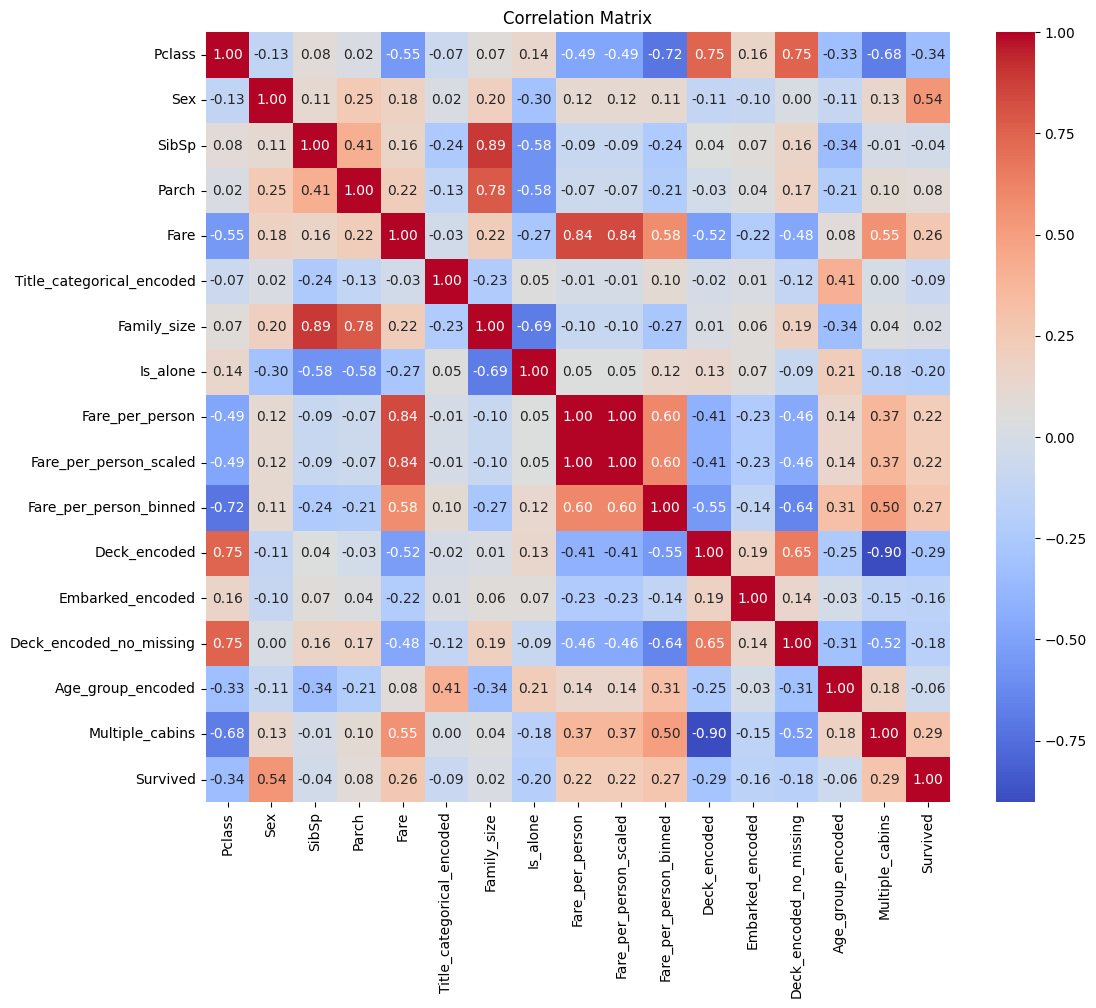

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 10))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

# 5. Classification


## 5.1 Import and create classifiers

In [170]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

# create Random Forest Classifier
rfc_clf = RandomForestClassifier(random_state=42)
# create a Logistic Regression Classifier
lrc_clf = LogisticRegression(random_state=42, max_iter=1000)
# create a Decision Tree Classifier
dtc_clf = DecisionTreeClassifier(random_state=42)
# create a SVM Classifier
svm_clf = SVC(random_state=42, probability=True)
# create a KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
# create a Naive Bayes Classifier
nb_clf = GaussianNB()
# create a XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)
# create a LightGBM Classifier
lgbm_clf = lgb.LGBMClassifier(random_state=42, verbosity=0)
# create a Voting Classifier
voting_clf_h = VotingClassifier(estimators=[('rf', rfc_clf), ('lr', lrc_clf), ('dt', dtc_clf), ('svm', svm_clf),
                                              ('knn', knn_clf), ('nb', nb_clf), ('xgb', xgb_clf), ('lgbm', lgbm_clf)], voting='hard')
voting_clf_s = VotingClassifier(estimators=[('rf', rfc_clf), ('lr', lrc_clf), ('dt', dtc_clf), ('svm', svm_clf),
                                              ('knn', knn_clf), ('nb', nb_clf), ('xgb', xgb_clf), ('lgbm', lgbm_clf)], voting='soft')

## 5.2 Create a dictionary with the classifiers and list of usable features

In [174]:
classifiers = {'Decision Tree Classifier': dtc_clf, 'Random Forest Classifier': rfc_clf, 'Logistic Regression Classifier': lrc_clf,
                   'SVM Classifier': svm_clf, 'KNN Classifier': knn_clf, 'Naive Bayes Classifier': nb_clf,
                   'XGBoost Classifier': xgb_clf, 'LightGBM Classifier': lgbm_clf, 'Voting Classifier Hard': voting_clf_h,
                   'Voting Classifier Soft': voting_clf_s}

In [175]:
y = y.astype(int)

In [176]:
all_usable_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Title_categorical_encoded', 'Family_size', 'Is_alone', 'Fare_per_person', 'Fare_per_person_scaled', 
                                     'Fare_per_person_binned', 'Deck_encoded', 'Embarked_encoded', 'Deck_encoded_no_missing','Age_group_encoded', 'Multiple_cabins']

## 5.3 Calculate cross validation for each classifier and plot feature importance

Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

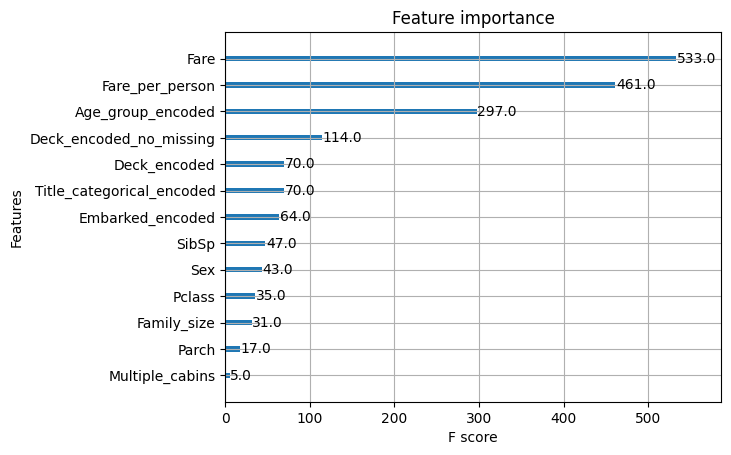

In [189]:
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score


import logging
import warnings

# Suppress LightGBM warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
logging.getLogger('lightgbm').setLevel(logging.ERROR)

cross_val_dict = {}
for key, value in classifiers.items():

    cv_scores = cross_val_score(value, X[all_usable_features], y, cv=10, n_jobs=-1).mean()
    cross_val_dict[key] = cv_scores

    value.fit(X[all_usable_features], y)
    prediction = value.predict(test[all_usable_features])
    pred = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction})
    pred.to_csv(f'submission_{key}.csv', index=False)
    print("Your submission was successfully saved!")

    if key == 'XGBoost Classifier':
        # plot feature importance
        plot_importance(value)


In [192]:
cross_val_dict

{'Decision Tree Classifier': 0.7980274656679152,
 'Random Forest Classifier': 0.8081023720349562,
 'Logistic Regression Classifier': 0.7991260923845194,
 'SVM Classifier': 0.6791136079900124,
 'KNN Classifier': 0.7340948813982522,
 'Naive Bayes Classifier': 0.6992759051186017,
 'XGBoost Classifier': 0.8181772784019975,
 'LightGBM Classifier': 0.8227091136079899,
 'Voting Classifier Hard': 0.8159925093632958,
 'Voting Classifier Soft': 0.8148564294631709}

# 6. Create a submission

In [193]:
voting_clf_s.fit(X[all_usable_features], y)
prediction = voting_clf_s.predict(test[all_usable_features])
pred = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': prediction})
pred.to_csv('submission.csv', index=False)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f